# Линейная регрессия и стохастический градиентный спуск

In [1]:
import statsmodels.api as sm
a = sm.distributions.ECDF([0, 1, 2, 3])

C:\Users\Sasha\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Задание основано на материалах лекций по линейной регрессии и градиентному спуску. Вы будете прогнозировать выручку компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио.

## Вы научитесь:
- решать задачу восстановления линейной регрессии
- реализовывать стохастический градиентный спуск для ее настройки
- решать задачу линейной регрессии аналитически

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\frac{1}{\ell}\sum_{i=1}^\ell{{(y_i - (w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}))}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$w_0 \leftarrow w_0 + \frac{2\eta}{\ell} \sum_{i=1}^\ell{{(y_i - (w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}))}}$$
$$w_j \leftarrow w_j + \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}(y_i - (w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}))}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
У градиентного спуска, описанного выше, есть один недостаток. На больших выборках вычисление градиента по всем имеющимся данным на каждом шаге может быть вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$w_0 \leftarrow w_0 + \frac{2\eta}{\ell} {(y_k - (w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}))}$$
$$w_j \leftarrow w_j + \frac{2\eta}{\ell} {x_{kj}(y_k - (w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}))},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, соответствующий целевому признаку, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$y = Xw$$
Домножением слева на $X^T$ получаем:
$$X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

## Инструкции по выполнению

В начале напишем простую функцию для записи ответов в текстовый файл. Ответами будут числа, полученные в ходе решения этого задания, округленные до 3 знаков после запятой. Полученные файлы после выполнения задания надо отправить в форму на странице задания на Coursera.org.

In [2]:
def write_answer_to_file(answer, filename):
    with open(filename, 'w') as f_out:
        f_out.write(str(round(answer, 3)))

**1. Загрузите данные из файла *advertising.csv* в объект pandas DataFrame. [Источник данных](http://www-bcf.usc.edu/~gareth/ISL/data.html).**

In [3]:
import pandas as pd
adver_data = pd.read_csv('advertising.csv')

**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.**

In [4]:
adver_data.head(5)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
adver_data.columns

Index([u'TV', u'Radio', u'Newspaper', u'Sales'], dtype='object')

**Создайте массивы NumPy *X* из столбцов TV, Radio и Newspaper и *y* - из столбца Sales. Используйте атрибут *values* объекта pandas DataFrame.**

In [6]:
X = adver_data[['TV', 'Radio', 'Newspaper']].values
y = adver_data[['Sales']].values


In [7]:
X[:5]

array([[ 230.1,   37.8,   69.2],
       [  44.5,   39.3,   45.1],
       [  17.2,   45.9,   69.3],
       [ 151.5,   41.3,   58.5],
       [ 180.8,   10.8,   58.4]])

**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение.**

In [8]:
import numpy as np

In [9]:
means = []
stds = []

means.append(adver_data['TV'].mean())
means.append(adver_data['Radio'].mean())
means.append(adver_data['Newspaper'].mean())

stds.append(np.std(adver_data['TV']))
stds.append(np.std(adver_data['Radio']))
stds.append(np.std(adver_data['Newspaper']))

print (means, stds)

([147.0425, 23.264000000000024, 30.553999999999995], [85.63933175679271, 14.809645640595184, 21.724106057557357])


In [10]:
for i in range(3):
    X[:,i] = (X[:,i] - means[i]) / stds[i]
print (X)

[[  9.69852266e-01   9.81522472e-01   1.77894547e+00]
 [ -1.19737623e+00   1.08280781e+00   6.69578760e-01]
 [ -1.51615499e+00   1.52846331e+00   1.78354865e+00]
 [  5.20496822e-02   1.21785493e+00   1.28640506e+00]
 [  3.94182198e-01  -8.41613655e-01   1.28180188e+00]
 [ -1.61540845e+00   1.73103399e+00   2.04592999e+00]
 [ -1.04557682e+00   6.43904671e-01  -3.24708413e-01]
 [ -3.13436589e-01  -2.47406325e-01  -8.72486994e-01]
 [ -1.61657614e+00  -1.42906863e+00  -1.36042422e+00]
 [  6.16042873e-01  -1.39530685e+00  -4.30581584e-01]
 [ -9.45155670e-01  -1.17923146e+00  -2.92486143e-01]
 [  7.90028350e-01   4.96973404e-02  -1.22232878e+00]
 [ -1.43908760e+00   7.99208859e-01   1.62704048e+00]
 [ -5.78501712e-01  -1.05768905e+00  -1.07502697e+00]
 [  6.66253447e-01   6.50657027e-01   7.11007392e-01]
 [  5.64664612e-01   1.65000572e+00   1.02862691e+00]
 [ -9.25304978e-01   9.00494200e-01   3.84117072e+00]
 [  1.56887609e+00   1.10306488e+00   1.16211917e+00]
 [ -9.08957349e-01  -1.86635

**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [9]:
import numpy as np
W0 = np.ones((len(X), 1))
X = np.rot90(X)
X = np.rot90(X)
X = np.hstack((X, W0))
X = np.rot90(X)
X = np.rot90(X)

X

array([[  1.00000000e+00,   9.69852266e-01,   9.81522472e-01,
          1.77894547e+00],
       [  1.00000000e+00,  -1.19737623e+00,   1.08280781e+00,
          6.69578760e-01],
       [  1.00000000e+00,  -1.51615499e+00,   1.52846331e+00,
          1.78354865e+00],
       [  1.00000000e+00,   5.20496822e-02,   1.21785493e+00,
          1.28640506e+00],
       [  1.00000000e+00,   3.94182198e-01,  -8.41613655e-01,
          1.28180188e+00],
       [  1.00000000e+00,  -1.61540845e+00,   1.73103399e+00,
          2.04592999e+00],
       [  1.00000000e+00,  -1.04557682e+00,   6.43904671e-01,
         -3.24708413e-01],
       [  1.00000000e+00,  -3.13436589e-01,  -2.47406325e-01,
         -8.72486994e-01],
       [  1.00000000e+00,  -1.61657614e+00,  -1.42906863e+00,
         -1.36042422e+00],
       [  1.00000000e+00,   6.16042873e-01,  -1.39530685e+00,
         -4.30581584e-01],
       [  1.00000000e+00,  -9.45155670e-01,  -1.17923146e+00,
         -2.92486143e-01],
       [  1.00000000e

**2. Реализуйте функцию *mserror* - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения).**

In [10]:
def mserror(y, y_pred):
    y_pred=y_pred.reshape([200,1])
    return np.mean((y-y_pred)**2)

**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке? Запишите ответ в файл '1.txt'.**

In [11]:
y_pred = []
for i in range(len(y)):
    y_pred.append(np.median(y))

answer1 = mserror(y, y_pred)
print(answer1)
write_answer_to_file(answer1, '1.txt')


AttributeError: 'list' object has no attribute 'reshape'

**3. Реализуйте функцию *normal_equation*, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

In [12]:
def normal_equation(X, y):
    D = np.linalg.pinv(X) 
    print (D)
    D = np.dot(D, y)
    return D

In [13]:
norm_eq_weights = normal_equation(X, y)

print(norm_eq_weights)

[[  5.00000000e-03   5.00000000e-03   5.00000000e-03   5.00000000e-03
    5.00000000e-03   5.00000000e-03   5.00000000e-03   5.00000000e-03
    5.00000000e-03   5.00000000e-03   5.00000000e-03   5.00000000e-03
    5.00000000e-03   5.00000000e-03   5.00000000e-03   5.00000000e-03
    5.00000000e-03   5.00000000e-03   5.00000000e-03   5.00000000e-03
    5.00000000e-03   5.00000000e-03   5.00000000e-03   5.00000000e-03
    5.00000000e-03   5.00000000e-03   5.00000000e-03   5.00000000e-03
    5.00000000e-03   5.00000000e-03   5.00000000e-03   5.00000000e-03
    5.00000000e-03   5.00000000e-03   5.00000000e-03   5.00000000e-03
    5.00000000e-03   5.00000000e-03   5.00000000e-03   5.00000000e-03
    5.00000000e-03   5.00000000e-03   5.00000000e-03   5.00000000e-03
    5.00000000e-03   5.00000000e-03   5.00000000e-03   5.00000000e-03
    5.00000000e-03   5.00000000e-03   5.00000000e-03   5.00000000e-03
    5.00000000e-03   5.00000000e-03   5.00000000e-03   5.00000000e-03
    5.00000000e-03  

In [14]:
[ 14.0225,       3.92908869,   2.79906919,  -0.02259517]

[14.0225, 3.92908869, 2.79906919, -0.02259517]

**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper). Запишите ответ в файл '2.txt'.**

In [15]:
norm_eq_weights = np.rot90(norm_eq_weights)
answer2 = np.sum(norm_eq_weights * [1,0,0,0])
print(answer2)
write_answer_to_file(answer2, '2.txt')


14.0225


NameError: name 'write_answer_to_file' is not defined

**4. Напишите функцию *linear_prediction*, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами *w*.**

In [16]:
def linear_prediction(X, w):
    return np.dot(X, w)

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения? Запишите ответ в файл '3.txt'.**

In [17]:
norm_eq_weights

array([[ 14.0225    ,   3.91925365,   2.79206274,  -0.02253861]])

In [18]:

answer3 = mserror(y, linear_prediction(X, np.rot90(norm_eq_weights)))
print(answer3)
#write_answer_to_file(answer3, '3.txt')

409.130498371


**5. Напишите функцию *stochastic_gradient_step*, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция должна принимать матрицу *X*, вектора *y* и *w*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\eta$* (eta) - шаг градиентного спуска (по умолчанию *eta*=0.01). Результатом будет вектор обновленных весов.**

In [23]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    return w + 2 * eta/X.shape[0] * X[train_ind] * (y[train_ind] - linear_prediction(X[train_ind], w))

**6. Напишите функцию *stochastic_gradient_descent*, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- max_weight_dist - минимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
- verbose - флаг печати информации (например, для отладки, по умолчанию False)

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов *w_init*, состоящий из нулей. Оставьте параметры  *eta* и *seed* равными их значениям по умолчанию (*eta*=0.01, *seed*=42 - это важно для проверки ответов).**

In [24]:
import math
def euclidean(w, w_new):
    return math.sqrt(np.sum((w - w_new)**2))

In [27]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e6,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
        
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])

        w_new = stochastic_gradient_step(X, y, w, random_ind, eta)
        weight_dist = np.linalg.norm(w - w_new)
        w = w_new
        errors.append(mserror(y, linear_prediction(X, w)))
        iter_num += 1
        
        
    return w, errors

In [25]:
%%time
w = np.zeros(4)
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, y, w)


Wall time: 6.61 s


In [31]:
y

array([[ 22.1],
       [ 10.4],
       [  9.3],
       [ 18.5],
       [ 12.9],
       [  7.2],
       [ 11.8],
       [ 13.2],
       [  4.8],
       [ 10.6],
       [  8.6],
       [ 17.4],
       [  9.2],
       [  9.7],
       [ 19. ],
       [ 22.4],
       [ 12.5],
       [ 24.4],
       [ 11.3],
       [ 14.6],
       [ 18. ],
       [ 12.5],
       [  5.6],
       [ 15.5],
       [  9.7],
       [ 12. ],
       [ 15. ],
       [ 15.9],
       [ 18.9],
       [ 10.5],
       [ 21.4],
       [ 11.9],
       [  9.6],
       [ 17.4],
       [  9.5],
       [ 12.8],
       [ 25.4],
       [ 14.7],
       [ 10.1],
       [ 21.5],
       [ 16.6],
       [ 17.1],
       [ 20.7],
       [ 12.9],
       [  8.5],
       [ 14.9],
       [ 10.6],
       [ 23.2],
       [ 14.8],
       [  9.7],
       [ 11.4],
       [ 10.7],
       [ 22.6],
       [ 21.2],
       [ 20.2],
       [ 23.7],
       [  5.5],
       [ 13.2],
       [ 23.8],
       [ 18.4],
       [  8.1],
       [ 24.2],
       [

Populating the interactive namespace from numpy and matplotlib


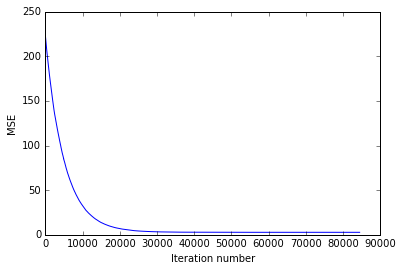

In [26]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

**Посмотрим на вектор весов, к которому сошелся метод.**

In [436]:
stoch_grad_desc_weights

array([ 8.842743  ,  2.48883009,  1.71429214,  0.43255158])

In [85]:
stoch_grad_desc_weights

array([  1.40190566e+01,   3.91069256e+00,   2.78209808e+00,
        -8.10462217e-03])

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [437]:
stoch_errors_by_iter[-1]

32.776694648264154

In [86]:
stoch_errors_by_iter[-1]

2.7844125884067035

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Запишите ответ в файл '4.txt'.**

In [446]:
answer4 = mserror(y, linear_prediction(X, stoch_grad_desc_weights))
print(answer4)
write_answer_to_file(answer4, '4.txt')

2.78441258841


In [87]:
answer4 = mserror(y, linear_prediction(X, stoch_grad_desc_weights))
print(answer4)
#write_answer_to_file(answer4, '4.txt')

2.78441258841


**Ответами к заданию будут текстовые файлы, полученные в ходе этого решения. Обратите внимание, что отправленные файлы не должны содержать пустую строку в конце. Данный нюанс является ограничением платформы Coursera. Мы работаем над исправлением этого ограничения.**